In [ ]:
# Core Libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
from google.colab import drive

# Deep Learning
import tensorflow as tf
from tensorflow.keras import layers, models # For building the EfficientNetB0

from tensorflow.keras.applications import EfficientNetB0


# Data Visualization
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# OS and Warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress unnecessary TensorFlow warnings


EfficientNetB0 Model- Architecture and summary and Training the model

In [ ]:


# Define image size, batch size, and number of epochs
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10  # Adjust as needed

# Define the input shape for EfficientNet (same as CNN/VGG)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Load pre-trained EfficientNetB0 model + top layers removed
EfficientNetB0_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers (pre-trained weights will not be updated during training)
EfficientNetB0_base_model.trainable = False

# Build the full model
EfficientNetB0_model = models.Sequential([
    EfficientNetB0_base_model,  # EfficientNet base model
    layers.GlobalAveragePooling2D(),  # Pooling layer
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to avoid overfitting
    layers.Dense(3, activation='softmax')  # Output layer with 3 classes (potato diseases)
])

# Compile the model
EfficientNetB0_model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy since we're dealing with multiple classes
              metrics=['accuracy'])

# Model summary to check architecture
EfficientNetB0_model.summary()

# Now, let's train the model using your existing train_ds and val_ds
history_effB0 = EfficientNetB0_model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

# Save the model with a unique name (to avoid overwriting any previous models)
EfficientNetB0_model_save_path = '/content/drive/MyDrive/ds_plantleaves_potato'  # Adjust as needed
os.makedirs(EfficientNetB0_model_save_path, exist_ok=True)

# Save the model with the new name (for EfficientNet)
EfficientNetB0_model_version = 1
EfficientNetB0_model.save(os.path.join(EfficientNetB0_model_save_path, f'efficientnetB0_model_v{EfficientNetB0_model_version}.keras'))  # Versioning to avoid overwriting



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,926 (16.07 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 227s 564ms/step - accuracy: 0.8066 - loss: 0.4849 - val_accuracy: 0.9792 - val_loss: 0.0683
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 338ms/step - accuracy: 0.9703 - loss: 0.1040 - val_accuracy: 0.9896 - val_loss: 0.0464
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 356ms/step - accuracy: 0.9789 - loss: 0.0632 - val_accuracy: 0.9896 - val_loss: 0.0379
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - accuracy: 0.9781 - loss: 0.0568 - val_accuracy: 0.9792 - val_loss: 0.0385
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 335ms/step - accuracy: 0.9811 - loss: 0.0564 - val_accuracy: 0.9792 - val_loss: 0.0397
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 328ms/step - accuracy: 0.9823 - loss: 0.0527 - val_accuracy: 0.9844 - val_loss: 0.0289
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - accuracy: 0.9934 - loss: 0.0242 - val_accuracy: 0.9844 - val_loss: 0.0313
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.9932 - loss: 0.0232 - val_acc

Accuracy and Loss plots

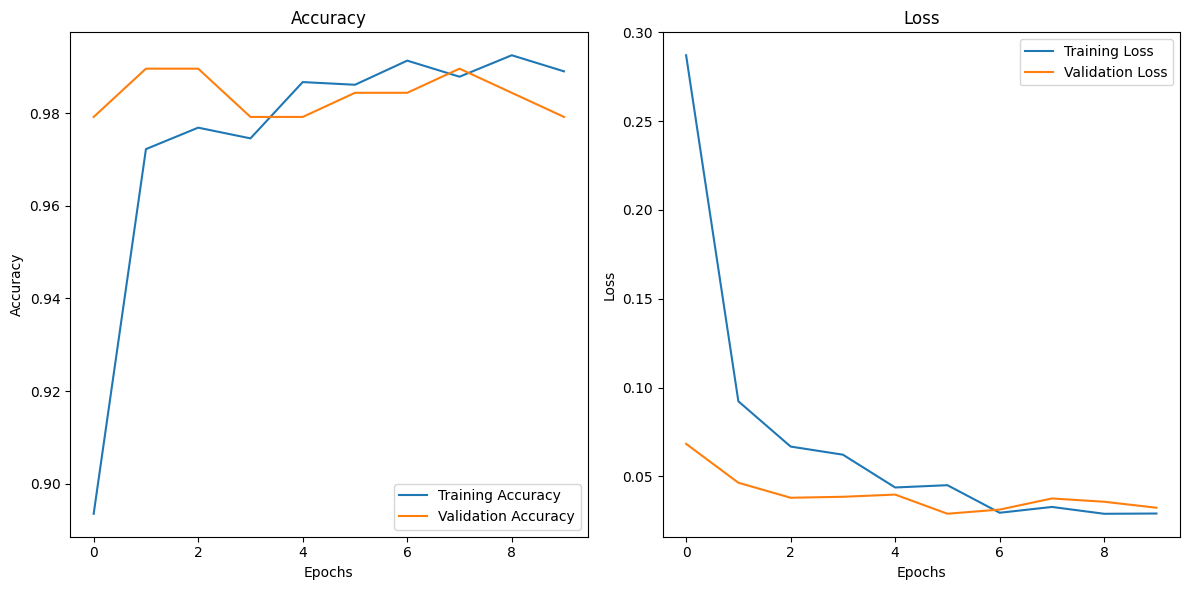

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_effB0.history['accuracy'], label='Training Accuracy')
plt.plot(history_effB0.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_effB0.history['loss'], label='Training Loss')
plt.plot(history_effB0.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

Predictions

In [ ]:
def predict(EfficientNetB0_model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    EfficientNetB0_predictions =EfficientNetB0_model.predict(img_array)

    EfficientNetB0_predicted_class = class_names[np.argmax(EfficientNetB0_predictions[0])]
    confidence = round(100 * (np.max(EfficientNetB0_predictions[0])), 2)
    return EfficientNetB0_predicted_class, confidence


Predicting a batch of images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


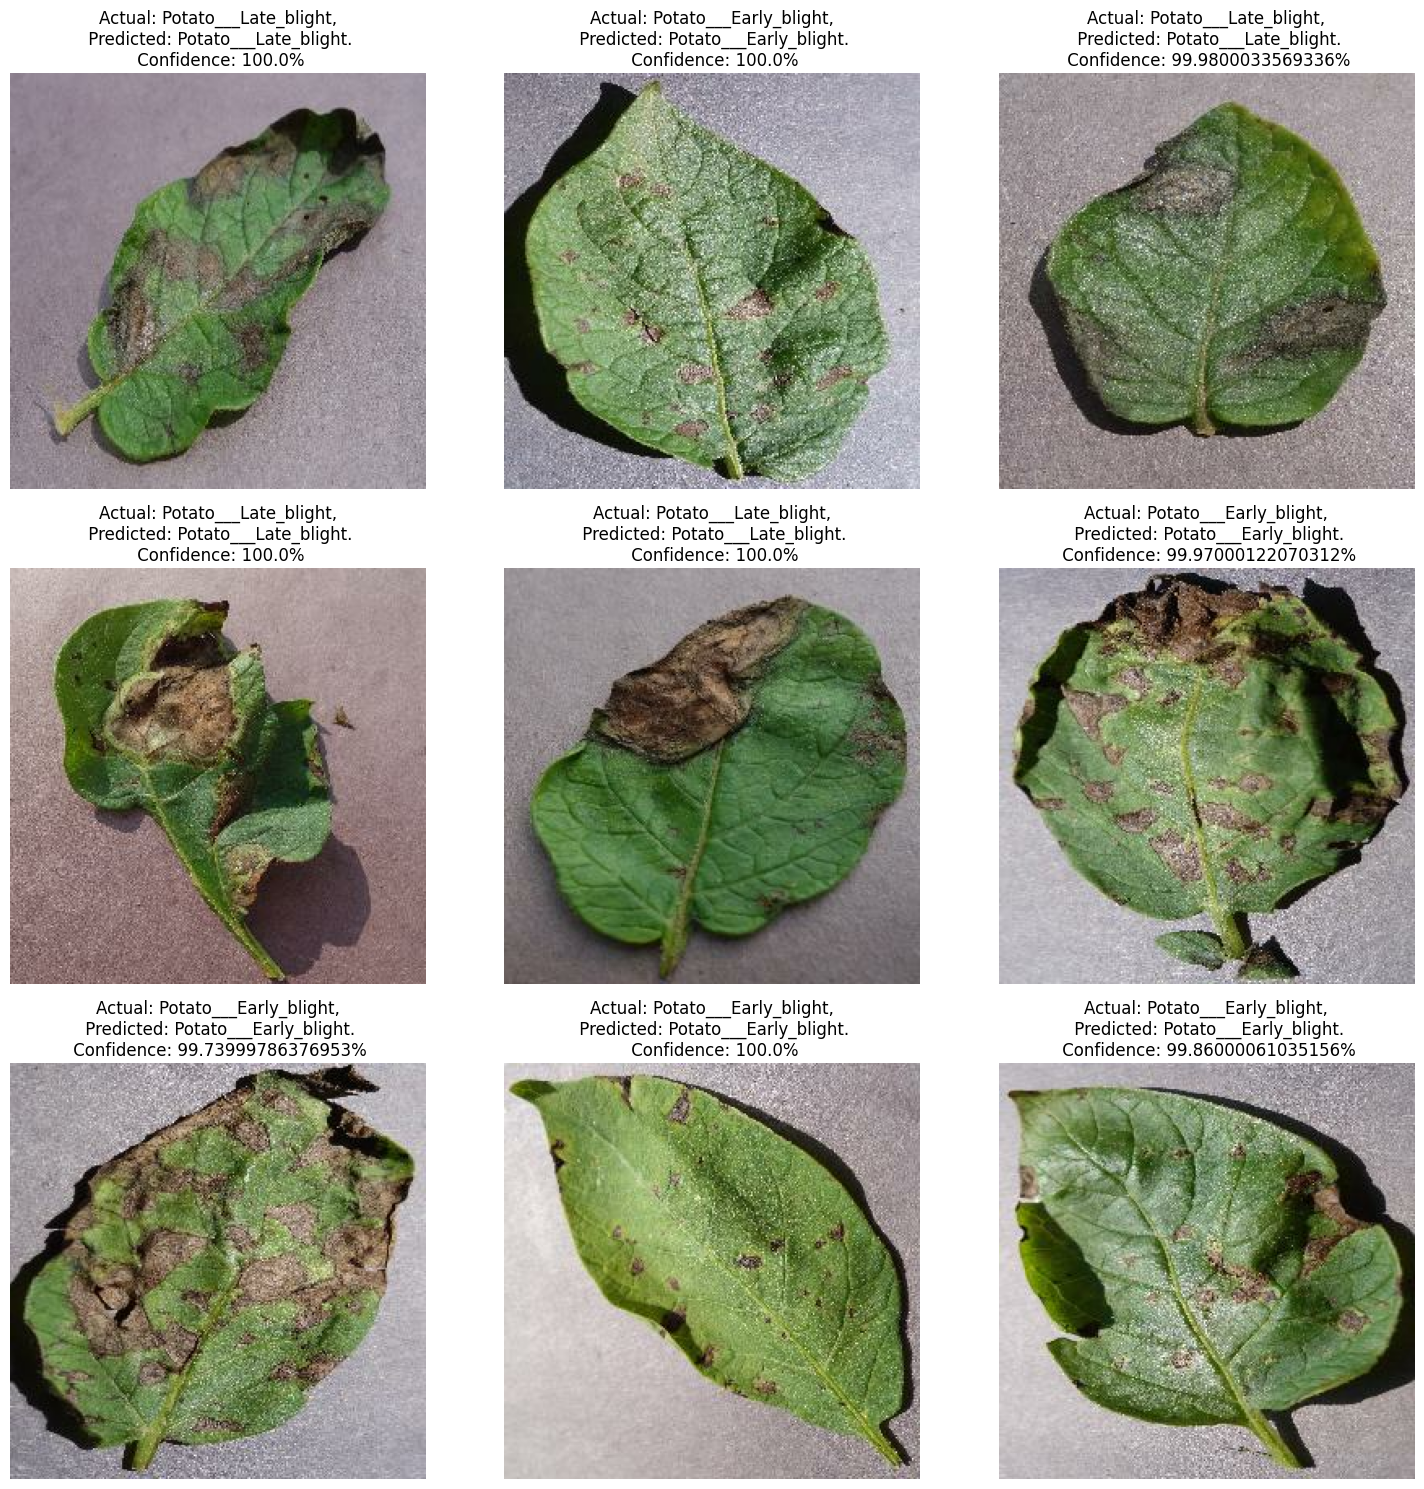

In [ ]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        image_np = images[i].numpy().astype("uint8")
        plt.imshow(image_np)

        EfficientNetB0_predicted_class, confidence = predict(EfficientNetB0_model, image_np)
        actual_class = class_names[np.argmax(labels[i].numpy())]  # decode one-hot

        plt.title(f"Actual: {actual_class},\n Predicted: {EfficientNetB0_predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

plt.tight_layout()
plt.show()


Evaluating- Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


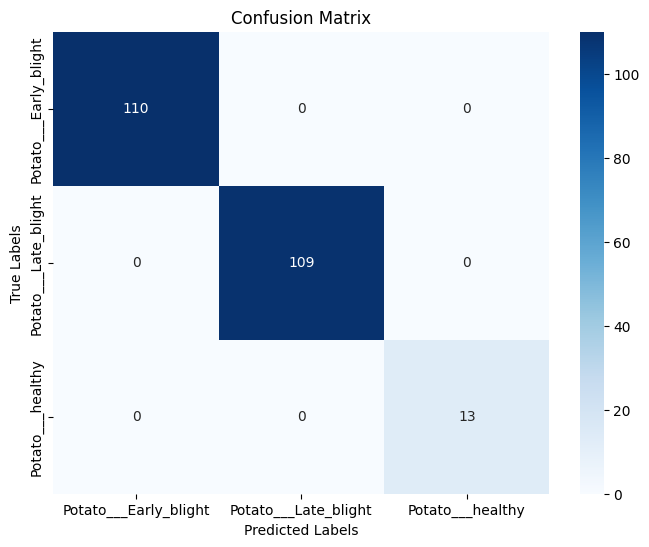

In [ ]:


# Initialize lists to store the true labels and predicted labels
y_true3 = []
y_pred3 = []

# Loop through the test dataset and get predictions
for images_batch, labels_batch in test_ds:
    # Predict labels using the model
    EfficientNetB0_batch_predictions = EfficientNetB0_model.predict(images_batch)
    EfficientNetB0_predicted_labels = np.argmax(EfficientNetB0_batch_predictions, axis=1)  # Get the predicted class labels (indices)

     # Convert one-hot encoded labels to class indices
    true_labels = np.argmax(labels_batch.numpy(), axis=1)

    # Append the true and predicted labels to the lists
    y_true3.extend(true_labels)
    y_pred3.extend(EfficientNetB0_predicted_labels)

# Compute confusion matrix
cm2 = confusion_matrix(y_true3, y_pred3)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()






Evaluating the Metrics

In [ ]:

# Calculate precision, recall, f1-score, and accuracy
precision = precision_score(y_true3, y_pred3, average='weighted')  # Change 'weighted' to 'micro' or 'macro' if needed
recall = recall_score(y_true3, y_pred3, average='weighted')
f1 = f1_score(y_true3, y_pred3, average='weighted')
accuracy = accuracy_score(y_true3, y_pred3)

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0
